In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = pd.read_csv(r'C:\Users\localadmin\source\repos\joantomdriessen\recordings\nogps.csv')

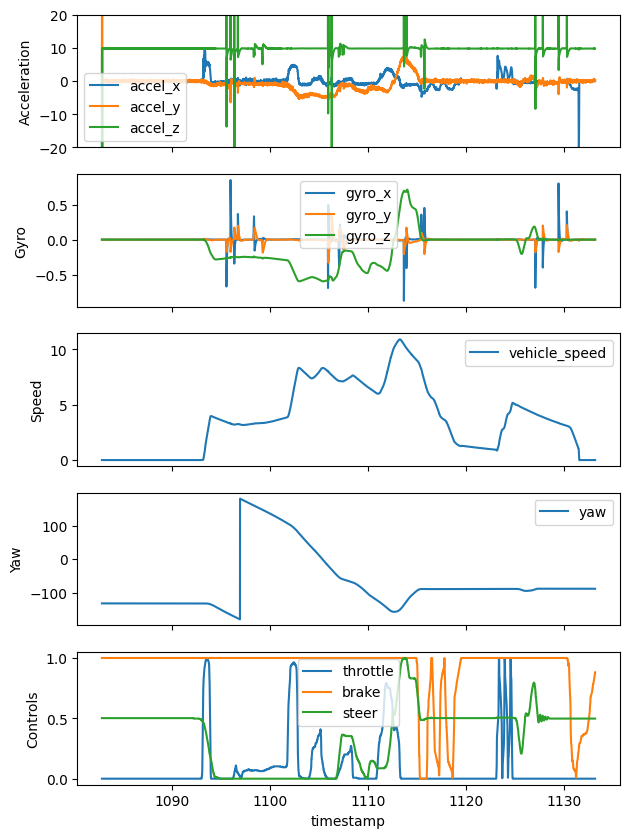

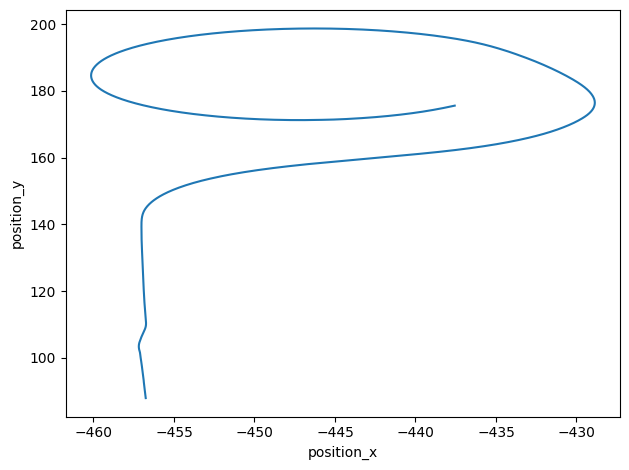

In [36]:
# Checking other values

acc = data[['timestamp', 'accel_x', 'accel_y', 'accel_z']]
gyro = data[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z']]
speed = data[['timestamp', 'vehicle_speed']]
controls = data[['timestamp','throttle', 'brake','steer']]
# gps = data[['timestamp', 'gps_latitude', 'gps_longitude', 'gps_altitude']]

# create plots for acc, gyro, speed, controls (scale them vs max), and gps
fig, axs = plt.subplots(5, 1, figsize=(7, 10), sharex=True)

acc.plot(x='timestamp', ax=axs[0])
axs[0].set_ylabel('Acceleration')
axs[0].set_ylim((-20,20))

gyro.plot(x='timestamp', ax=axs[1])
axs[1].set_ylabel('Gyro')

speed.plot(x='timestamp', ax=axs[2])
axs[2].set_ylabel('Speed')

data.plot(x='timestamp', y='yaw', ax=axs[3])
axs[3].set_ylabel('Yaw')

scaler = MinMaxScaler()
controls_scaled = controls.copy()
controls_scaled[['throttle', 'brake','steer']] = scaler.fit_transform(controls[['throttle', 'brake','steer']])
controls_scaled.plot(x='timestamp', ax=axs[4])
axs[4].set_ylabel('Controls')

# gps.plot(x='timestamp', y=['gps_latitude', 'gps_longitude', 'gps_altitude'], ax=axs[4])
# axs[4].set_ylabel('GPS')
fig, ax = plt.subplots()
plt.plot(data.position_x, data.position_y)
plt.xlabel('position_x')
plt.ylabel('position_y')

plt.tight_layout()


In [41]:
def xy_to_gps(x, y, x_origin, y_origin):
    # Earth’s radius, sphere
    R=6378137

    # offsets in meters
    dn = y
    de = x

    # Coordinate offsets in radians
    dLat = dn/R
    dLon = de/(R*np.cos(np.pi*x_origin/180))

    # OffsetPosition, decimal degrees
    lat = dLat * 180/np.pi
    long = dLon * 180/np.pi

    lat += y_origin
    long += x_origin

    return lat, long

x_origin, y_origin = 4.523204768439975, 51.89386778997622

data['gps_latitude'], data['gps_longitude'] = xy_to_gps(data.position_x, data.position_y, x_origin, y_origin)